<a href="https://colab.research.google.com/github/Nathtaba/Classificador_Sentimentos_ML/blob/main/ClassificadorSentimentos_Avaliacoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [52]:
#Leitura da basa
dt = pd.read_csv("b2w.csv")
dt.head()

,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
0,11955,Bem macio e felpudo...recomendo. Preço imbatí...,bem macio e felpudo...recomendo. preco imbati...,"['bem', 'macio', 'felpudo', 'recomendo', 'prec...",1.0,4,1,1
1,35478,Produto excepcional! recomendo!!! inovador e ...,produto excepcional! recomendo!!! inovador e ...,"['produto', 'excepcional', 'recomendo', 'inova...",1.0,5,1,1
2,122760,recebi o produto antes do prazo mas veio com d...,recebi o produto antes do prazo mas veio com d...,"['recebi', 'produto', 'antes', 'do', 'prazo', ...",0.0,1,1,1
3,17114,Bom custo beneficio. Adequado para pessoas que...,bom custo beneficio. adequado para pessoas que...,"['bom', 'custo', 'beneficio', 'adequado', 'par...",1.0,5,1,1
4,19112,Além de higiênico tem o tamanho ideal. Só falt...,alem de higienico tem o tamanho ideal. so falt...,"['alem', 'de', 'higienico', 'tem', 'tamanho', ...",NaN,3,-1,1


In [53]:
dt.describe()

,original_index,polarity,rating,kfold_polarity,kfold_rating
count,132373.000000,116058.000000,132373.000000,132373.000000,132373.000000
mean,66186.000000,0.691895,3.492004,4.698813,5.499921
std,38212.937929,0.461712,1.530289,3.434905,2.872311
min,0.000000,0.000000,1.000000,-1.000000,1.000000
25%,33093.000000,0.000000,2.000000,2.000000,3.000000
50%,66186.000000,1.000000,4.000000,5.000000,5.000000
75%,99279.000000,1.000000,5.000000,8.000000,8.000000
max,132372.000000,1.000000,5.000000,10.000000,10.000000


In [54]:
#Removendo as colunas que não serão usadas
avaliacoes = dt.drop(["original_index", "review_text_processed", "review_text_tokenized", "rating", "kfold_polarity", "kfold_rating"], axis=1)

In [55]:
avaliacoes.head()

,review_text,polarity
0,Bem macio e felpudo...recomendo. Preço imbatí...,1.0
1,Produto excepcional! recomendo!!! inovador e ...,1.0
2,recebi o produto antes do prazo mas veio com d...,0.0
3,Bom custo beneficio. Adequado para pessoas que...,1.0
4,Além de higiênico tem o tamanho ideal. Só falt...,NaN


In [56]:
avaliacoes.shape

(132373, 2)

In [74]:
#Remove valores nulos
avaliacoes.dropna(inplace=True, axis=0)
avaliacoes.head()

,review_text,polarity
0,Bem macio e felpudo...recomendo. Preço imbatí...,1.0
1,Produto excepcional! recomendo!!! inovador e ...,1.0
2,recebi o produto antes do prazo mas veio com d...,0.0
3,Bom custo beneficio. Adequado para pessoas que...,1.0
5,"ótmo produto atendeu as expectativas, a entreg...",1.0


In [58]:
avaliacoes['polarity'].value_counts()

polarity
1.0    80300
0.0    35758
Name: count, dtype: int64

In [83]:
#Vetorizando os dados
vetorizar = CountVectorizer(max_features=100) #limitando a 100 palavras
bag_of_words = vetorizar.fit_transform(avaliacoes.review_text)
print(bag_of_words.shape)

(116058, 100)


In [85]:
def treinar_modelo(dados, coluna_texto, coluna_sentimento):
  vetorizar = CountVectorizer(max_features=100)
  bag_of_words = vetorizar.fit_transform(dados[coluna_texto])
  X_treino, X_teste, y_treino, y_teste = train_test_split(bag_of_words, dados[coluna_sentimento],stratify=dados[coluna_sentimento],random_state = 42)

  regressao_logistica = LogisticRegression()
  regressao_logistica.fit(X_treino, y_treino)
  return regressao_logistica.score(X_teste, y_teste)


In [86]:
print(treinar_modelo(avaliacoes, "review_text", "polarity"))

0.8882302257453042


In [87]:
todas_avaliacoes = [texto for texto in avaliacoes.review_text]
todas_palavras = ' '.join(todas_avaliacoes)

Criando a Word Cloud

In [88]:
nuvem_palavras = WordCloud(width=800, height=500,max_font_size=110,collocations=False).generate(todas_palavras)

In [90]:
nuvem_palavras

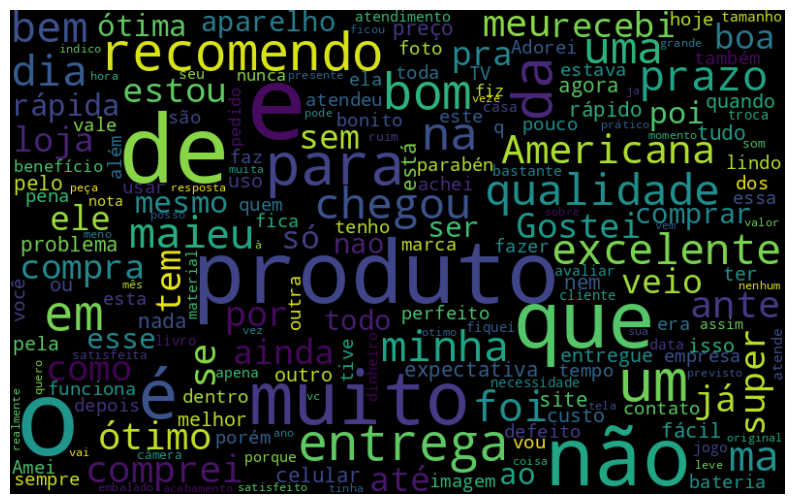

In [91]:
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis("off")
plt.show()

In [94]:
avaliacoes.query("polarity == 1")

,review_text,polarity
0,Bem macio e felpudo...recomendo. Preço imbatí...,1.0
1,Produto excepcional! recomendo!!! inovador e ...,1.0
3,Bom custo beneficio. Adequado para pessoas que...,1.0
5,"ótmo produto atendeu as expectativas, a entreg...",1.0
6,"GOSTEI MUITO DO PRODUTO! TEM ÓTIMA QUALIDADE, ...",1.0
...,...,...
132362,toalhas do ótima qualidade e macias. Atendeu p...,1.0
132363,O TELEVISOR É LINDO E UMA QUALIDADE DE IMAGEM ...,1.0
132364,"Tudo de bom, produto de primeira linha, goste...",1.0
132367,"Ótimo jogo, um dos melhores que joguei. Entreg...",1.0


In [105]:
def word_cloud_neg(dados, coluna_texto):
  texto_negativo = dados.query("polarity == 0")
  todas_avaliacoes = [texto for texto in texto_negativo[coluna_texto]]
  todas_palavras = ' '.join(todas_avaliacoes)
  nuvem_palavras = WordCloud(width=800, height=500,max_font_size=110,collocations=False).generate(todas_palavras)

  plt.figure(figsize=(10,7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis("off")
  plt.show()

In [106]:
def word_cloud_pos(dados, coluna_texto):
  texto_positivo = dados.query("polarity == 1")
  todas_avaliacoes = [texto for texto in texto_positivo[coluna_texto]]
  todas_palavras = ' '.join(todas_avaliacoes)
  nuvem_palavras = WordCloud(width=800, height=500,max_font_size=110,collocations=False).generate(todas_palavras)

  plt.figure(figsize=(10,7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis("off")
  plt.show()

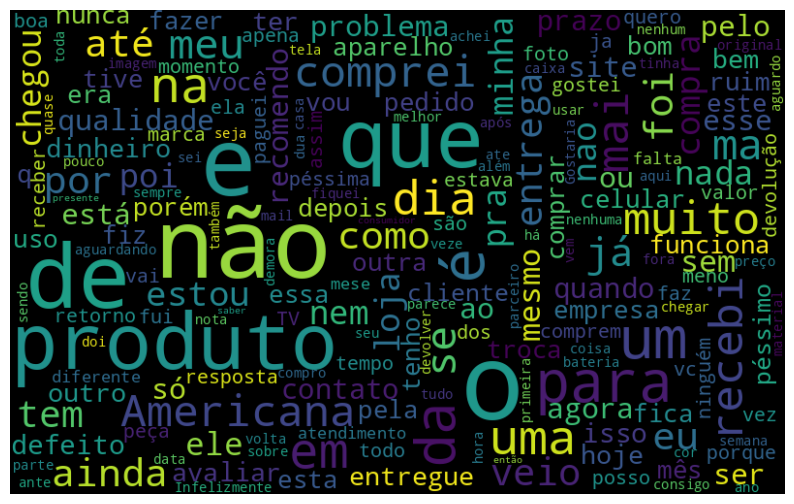

In [107]:
#Word CLoud Negativo
word_cloud_neg(avaliacoes, "review_text")

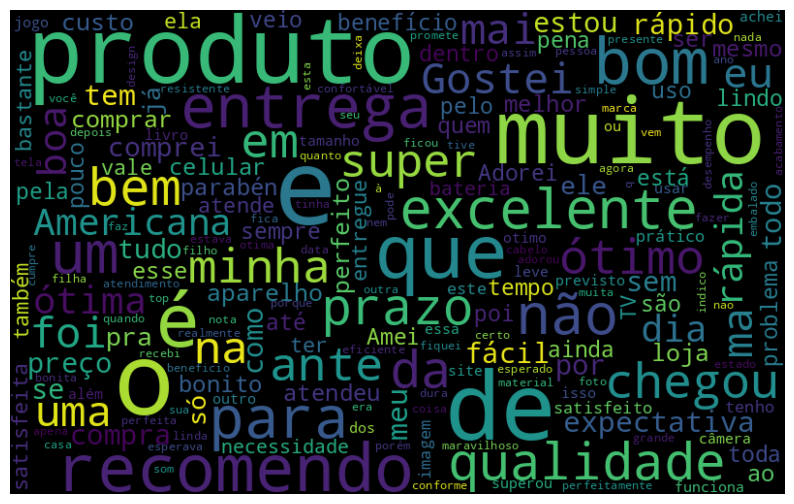

In [108]:
# Word Cloud Positivo
word_cloud_pos(avaliacoes, "review_text")